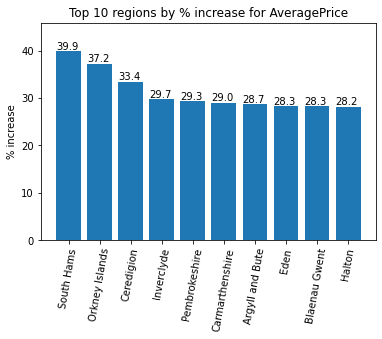

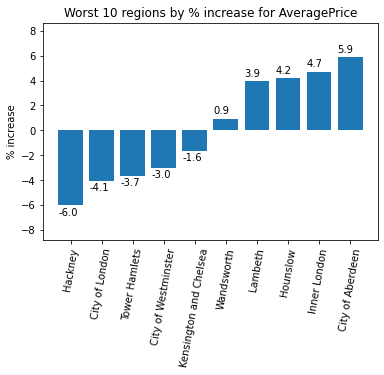

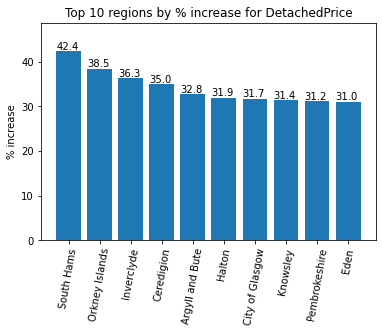

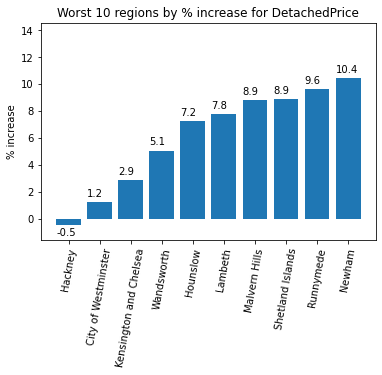

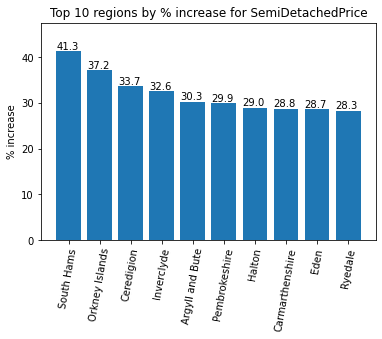

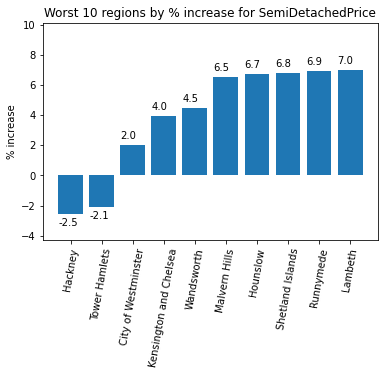

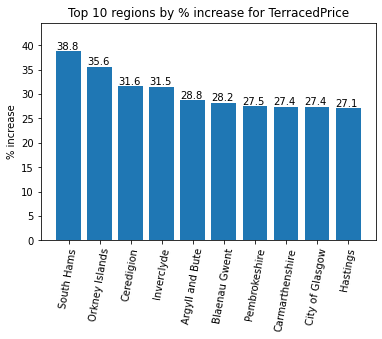

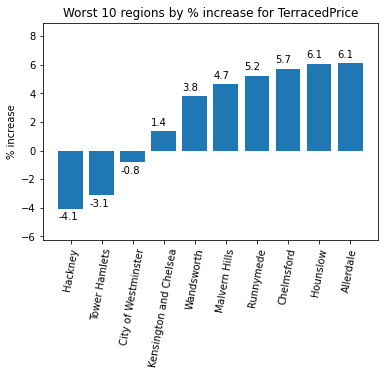

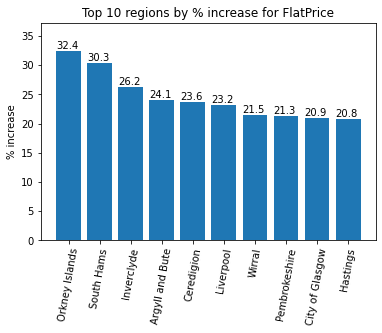

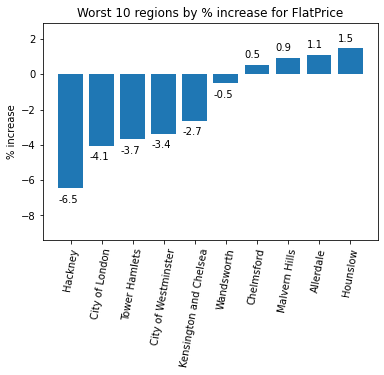

In [41]:
import csv

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

ukhpifull_data = pd.read_csv('ukhpifull.csv')
    
hpidata_raw = pd.DataFrame(ukhpifull_data)


#filtering data for columns that will be more useful
hpidata = hpidata_raw.filter(['Date','RegionName','AveragePrice','DetachedPrice','SemiDetachedPrice','TerracedPrice',
                                  'FlatPrice'], axis=1)
#converting date to datetime
hpidata['Date'] = pd.to_datetime(hpidata['Date'], format='%d/%m/%Y')

#filtering by date. only need start and end of pandemic values to calculate change across pandemic
hpi_pandemic_start = hpidata.loc[(hpidata['Date'] == '2020-03-01')]
hpi_pandemic_end = hpidata.loc[(hpidata['Date'] == '2021-11-01')]  

#figure counter for loop
i=1

for column in list(hpidata.columns):
    
    if column == 'Date' or column == 'RegionName':
        
        continue
    
    else:
        #array of average price on 01/03/2020 by region
        average_start_price_array = hpi_pandemic_start[column].to_numpy()

        #array of average price on 01/11/2021 region
        average_end_price_array = hpi_pandemic_end[column].to_numpy()
        #print(average_end_price_array)

        #array of % price change from 01/03/2020 to 01/11/2021
        percent_change_in_average_price = ((average_end_price_array - average_start_price_array)/average_start_price_array) * 100

        #converting arrays back to list so pandas can be used
        regions_list = list(hpi_pandemic_start['RegionName'])
        percent_change_list = list(percent_change_in_average_price)

        #pandas dataframe of regions and their corresponding % change
        regions_with_percent_changes = pd.DataFrame(percent_change_in_average_price, regions_list, columns=['%Change'])

        #Top 10 and bottom 10 regions by % increase
        top10_perc_change = regions_with_percent_changes['%Change'].nlargest(n=10)
        bottom10_perc_change = regions_with_percent_changes['%Change'].nsmallest(n=10)


        #creating bar charts of regions against % increase for the top 10 and worst 10 regions.
        plt.figure(i)
        bars = plt.bar(list(top10_perc_change.keys()),top10_perc_change)

        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x(), yval + .4, yval.round(1))

        plt.title(f'Top 10 regions by % increase for {column}')
        #plt.grid(axis='y')
        plt.xticks(rotation='80')
        plt.ylabel('% increase')
        plt.ylim(0, max(top10_perc_change)*1.15)


        plt.figure(i+1)
        bars = plt.bar(list(bottom10_perc_change.keys()),bottom10_perc_change)

        for bar in bars:
            yval = bar.get_height()
            if yval >= 0:
                plt.text(bar.get_x(), yval + .4, yval.round(1))
            else :
                plt.text(bar.get_x(), yval - .8, yval.round(1))

        plt.title(f'Worst 10 regions by % increase for {column}')
        plt.xticks(rotation='80')
        plt.ylabel('% increase')
        plt.ylim(min(bottom10_perc_change)*1.3 -1, max(bottom10_perc_change)*1.3 + 1)

        plt.show()
        
        #update figure counter
        i = i + 2